# WIDS 2021 - Identificação de pacientes com diabetes em UTIs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [ ]:
#Primeira seleção de variáveis, obtido acuracia na previsão de 0,70868
colunas1 = ['age', 'bmi', 'ethnicity', 'gender', 'arf_apache','creatinine_apache', 'glucose_apache','map_apache',
           'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min',
           'd1_diasbp_max', 'd1_diasbp_min', 'd1_sysbp_max', 'd1_sysbp_min', 'diabetes_mellitus']

In [ ]:
#Segunda seleção de variáveis, obtido acuracia na previsão de 0,72366 com LGBMClassifier e 0,70 com XGBClassifier
colunas2 = ['age', 'bmi', 'ethnicity', 'gender', 'weight', 'apache_3j_diagnosis', 'arf_apache',
           'd1_creatinine_max','d1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min',
           'd1_hemaglobin_max', 'd1_hemaglobin_min', 'diabetes_mellitus']

In [ ]:
#Terceira seleção de variáveis, obtido acuracia na previsão de 0.70123
colunas3 = ['age', 'bmi', 'gender', 'ethnicity', 'weight', 'hepatic_failure', 'd1_diasbp_max', 'd1_diasbp_noninvasive_max', 
'd1_mbp_max', 'd1_mbp_noninvasive_max', 'd1_heartrate_max', 'd1_resprate_max',
'd1_spo2_max', 'd1_sysbp_max', 'd1_sysbp_noninvasive_max', 'd1_temp_max', 'd1_bun_max',
'd1_calcium_max', 'd1_creatinine_max', 'd1_glucose_max', 'd1_hco3_max', 'd1_hemaglobin_max', 
'd1_hematocrit_max', 'd1_platelets_max', 'd1_potassium_max', 'd1_sodium_max', 'd1_wbc_max',
'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 
 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'map_apache', 'ventilated_apache',
 'glucose_apache', 'creatinine_apache', 'hematocrit_apache', 'diabetes_mellitus']

In [ ]:
#Quarta da seleção de variáveis, obtido acuracia na previsão de: 0.73796
colunas4 = ['age', 'bmi', 'ethnicity', 'gender', 'weight', 'hepatic_failure', 'apache_3j_diagnosis', 'arf_apache',
            'd1_creatinine_max','d1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min',
           'd1_mbp_max', 'd1_mbp_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'diabetes_mellitus']

In [3]:
#Quinta seleção de variáveis, obtido acuracia na previsão de: 
colunas5 = ['age', 'ethnicity', 'gender', 'weight', 'arf_apache', 'map_apache',
            'd1_creatinine_max','d1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min',
            'd1_mbp_max', 'd1_mbp_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 
            'diabetes_mellitus']

In [4]:
data = pd.read_parquet('train.parquet', engine='pyarrow')

In [5]:
df_train = data[colunas5] 

In [6]:
df_train.shape

(130157, 15)

In [7]:
df_train.count()

age                  130157
ethnicity            130157
gender               130157
weight               130157
arf_apache           130157
map_apache           130157
d1_creatinine_max    130157
d1_creatinine_min    130157
d1_glucose_max       130157
d1_glucose_min       130157
d1_mbp_max           130157
d1_mbp_min           130157
d1_hemaglobin_max    130157
d1_hemaglobin_min    130157
diabetes_mellitus    130157
dtype: int64

In [8]:
df_train.describe()

,age,ethnicity,gender,weight,arf_apache,map_apache,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_mbp_max,d1_mbp_min,d1_hemaglobin_max,d1_hemaglobin_min,diabetes_mellitus
count,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,62.322088,1.960794,0.541823,83.795705,0.027997,87.181062,1.490518,1.363943,173.587577,114.451377,104.224115,64.355650,11.469323,10.931626,0.216285
std,16.660000,0.973878,0.498250,24.685131,0.164965,41.851469,1.451990,1.276652,83.971864,37.067942,20.885761,15.414567,2.028433,2.208810,0.411712
min,0.000000,0.000000,0.000000,38.600000,0.000000,5.155029,0.312539,-0.018171,46.814882,33.000000,60.000000,22.000000,6.495627,5.289099,0.000000
25%,53.000000,2.000000,0.000000,67.000000,0.000000,54.000000,0.780000,0.730000,119.000000,92.000000,90.000000,55.000000,10.100000,9.400000,0.000000
50%,65.000000,2.000000,1.000000,80.300000,0.000000,66.000000,1.070000,1.000000,152.507134,109.000000,102.000000,64.000000,11.464398,11.000000,0.000000
75%,75.000000,2.000000,1.000000,96.400000,0.000000,124.000000,1.510000,1.400000,196.000000,129.000000,116.000000,74.000000,12.800000,12.400000,0.000000
max,124.699630,5.000000,1.000000,186.000000,1.000000,200.000000,11.143450,9.937900,611.000000,288.000000,184.000000,112.000000,17.518794,17.252279,1.000000


D:\AnaConda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


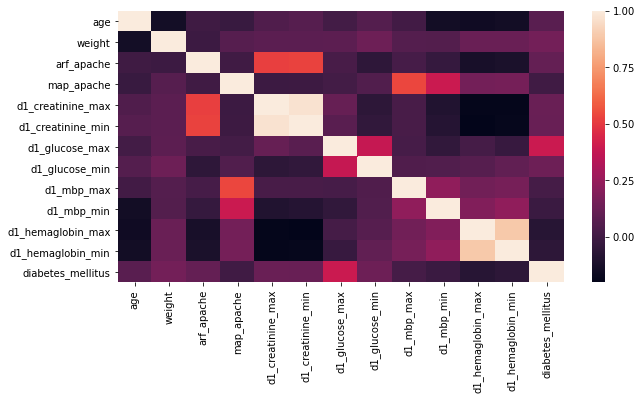

In [9]:
## Correlação das variaveis

types = df_train.dtypes

columns_num = []

for col in df_train.columns:
    if types[col] == 'float64':
        columns_num.append(col)

df_train_corr = df_train[columns_num]
df_train_corr['diabetes_mellitus'] = df_train['diabetes_mellitus'].copy()


corr = df_train_corr.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=False)

# Criação de variaveis com valores medios

df_train['d1_creatinine_mean'] = (df_train['d1_creatinine_max'] + df_train['d1_creatinine_min'])/2
df_train['d1_glucose_mean'] = (df_train['d1_glucose_max'] + df_train['d1_glucose_min']) /2 
df_train['d1_hemaglobin_mean'] = (df_train['d1_hemaglobin_max'] + df_train['d1_hemaglobin_min']) / 2
df_train['d1_sysbp_mean'] = (df_train['d1_sysbp_max'] + df_train['d1_sysbp_min'])/ 2


# Removendo colunas

colunas_remover = ['d1_creatinine_max','d1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 
                   'd1_hemaglobin_max', 'd1_hemaglobin_min','d1_sysbp_max', 'd1_sysbp_min']

df_train.drop(colunas_remover, axis=1, inplace=True)

df_train.head()



## Balanceamento dos dados

In [ ]:
#!pip install lightgbm

In [ ]:
#!pip install xgboost

In [10]:
#Importando bibliotecas de pre-processadores, modelo e analise
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score


In [11]:
df_train.diabetes_mellitus.value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

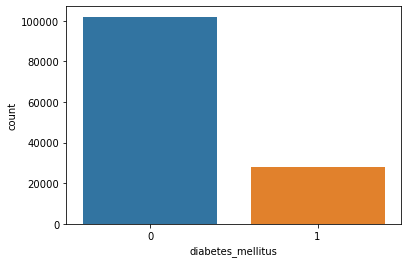

In [12]:
ax = sns.countplot(x="diabetes_mellitus", data=df_train)

In [13]:
X = df_train.drop('diabetes_mellitus', axis = 1)
y = df_train['diabetes_mellitus']

In [14]:
# sampling_strategy=0.5, define a quantidade de dados da classe minoritaria
smt = SMOTE()

In [15]:
X, y = smt.fit_sample(X, y)

In [16]:
np.bincount(y)

array([102006, 102006], dtype=int64)

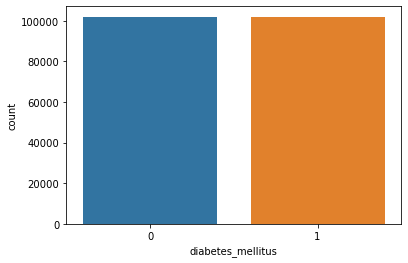

In [17]:
ax = sns.countplot(x=y)

In [18]:
#Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Scala os dados de treino e teste. Não melhorou resultado do modelo
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [ ]:
clf = LGBMClassifier()

In [ ]:
# Valores testados: learning rate a 0,08 deu overfitting
# 'learning_rate':[0.01, 0.03, 0,05, 0.07, 0.08], 'n_estimators':[0, 100, 150] ,
# 'boosting_type':['gbdt', 'rf','dart'], 'max_depth':[20, 50, 100],'num_leaves':[50, 80, 100, 120, 130]
# 'min_split_gain':[0, 1, 2]

params = {'learning_rate':[0.01], 'n_estimators':[50] , 
          'boosting_type':['gbdt', 'rf','dart'], 'max_depth':[22], 'num_leaves':[220]}

In [ ]:
grid = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
pred = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

print('\nMSE: ' + str(mean_squared_error(y_test,pred)))
print('Accuracy: ' + str(accuracy_score(y_test,pred)))
print('Recall: ' + str(recall_score(y_test,pred)))
print('F1-Score: ' + str(f1_score(y_test,pred)))

print('AUC: ' + str(roc_auc_score(y_test,pred)))
print('Cohen-Kappa: ' + str(cohen_kappa_score(y_test,pred)))


In [19]:
clf2 = XGBClassifier()

In [22]:
# Valores testados: RandomFlorest
# 'n_estimators':[50, 100, 150] , 'criterion': ['gini','entropy'], 
# 'max_depth': [20, 50, 100], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf':[5, 10, 15]

# XGBG
# 'learning_rate':[0.01, 0.03, 0.05], 'n_estimators':[100, 150] ,
#          'max_depth':[20, 50, 100],'min_child_weight':[0, 1, 2]


params2 = {'learning_rate':[0.05], 'n_estimators':[150] ,
          'max_depth':[100],'min_child_weight':[2]}

In [ ]:
grid2 = GridSearchCV(clf2, param_grid=params2, cv=5, n_jobs=-1, return_train_score=True)
grid2.fit(X_train, y_train)

In [ ]:
grid2.best_estimator_

In [ ]:
grid2.best_score_

In [ ]:
pred2 = grid2.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred2))

print('\nMSE: ' + str(mean_squared_error(y_test,pred2)))
print('Accuracy: ' + str(accuracy_score(y_test,pred2)))
print('Recall: ' + str(recall_score(y_test,pred2)))
print('F1-Score: ' + str(f1_score(y_test,pred2)))

print('AUC: ' + str(roc_auc_score(y_test,pred2)))
print('Cohen-Kappa: ' + str(cohen_kappa_score(y_test,pred2)))

## Predição

In [ ]:
df_pred = pd.read_parquet('test.parquet', engine='pyarrow')
df_pred.shape

In [ ]:
colunas_pred = X.columns.tolist()

In [ ]:
X_pred = df_pred[colunas_pred]
X_pred.shape

In [ ]:
X_pred.count()

In [ ]:
X_pred.head(10)

In [ ]:
predito = grid.predict(X_pred)

In [ ]:
df_pred['diabetes_mellitus'] = predito

df_pred.head()

In [ ]:
df_submission = df_pred[['encounter_id','diabetes_mellitus']]

df_submission.head()

In [ ]:
print((df_submission['diabetes_mellitus']==0).sum())
print((df_submission['diabetes_mellitus']==1).sum())

In [ ]:
df_submission.to_csv('wids2021_submission.csv',header=True,index=False)